In [1]:
!pip install powerlaw

In [2]:
import powerlaw

In [3]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from FT import *

In [4]:
path = "/cxnfs/Mark/Data/cleaned_data/"

interp_dict_pm10 = {n: pd.read_csv(path + 'pm10_interpolated/'+'pm10_interp_seg_'+ str(n)+'.csv',index_col = 0, parse_dates = True) for n in range(24)}
interp_dict_pm25 = {n: pd.read_csv(path + 'pm25_interpolated/'+'pm25_interp_seg_'+ str(n)+'.csv',index_col = 0, parse_dates = True) for n in range(24)}
interp_dict_pm1 = {n: pd.read_csv(path + 'pm1_interpolated/'+ 'pm1_interp_seg_'+ str(n)+'.csv',index_col = 0, parse_dates = True) for n in range(24)}

pm10_subset = interp_dict_pm10[17]
pm25_subset = interp_dict_pm25[17]
pm1_subset = interp_dict_pm1[17]
pm10_prepandemic = pm10_subset[:'2020-03-09']
pm25_prepandemic = pm25_subset[:'2020-03-09']
pm1_prepandemic = pm1_subset[:'2020-03-09']
pm10_ecq = pm10_subset['2020-03-17':]
pm25_ecq = pm25_subset['2020-03-17':]
pm1_ecq = pm1_subset['2020-03-17':]

pm10_freq_dom = normed_FT(pm10_subset)
pm25_freq_dom = normed_FT(pm25_subset)
pm1_freq_dom = normed_FT(pm1_subset)

pm10_prepandemic_spec = normed_FT(pm10_prepandemic)
pm25_prepandemic_spec = normed_FT(pm25_prepandemic) 
pm1_prepandemic_spec = normed_FT(pm1_prepandemic) 
pm10_ecq_spec = normed_FT(pm10_ecq) 
pm25_ecq_spec =  normed_FT(pm25_ecq) 
pm1_ecq_spec = normed_FT(pm1_ecq)

In [5]:
pm1_prepandemic_result = powerlaw.Fit(data = pm1_prepandemic_spec.abs_fourier_coeff_square[1:], xmin = pm1_prepandemic_spec.freq[1:].min())
pm1_ecq_result = powerlaw.Fit(data = pm1_ecq_spec.abs_fourier_coeff_square[1:], xmin = pm1_ecq_spec.freq[1:].min())

pm25_prepandemic_result = powerlaw.Fit(data = pm25_prepandemic_spec.abs_fourier_coeff_square[1:], xmin = pm25_prepandemic_spec.freq[1:].min())
pm25_ecq_result = powerlaw.Fit(data = pm25_ecq_spec.abs_fourier_coeff_square[1:], xmin = pm25_ecq_spec.freq[1:].min())


pm10_ecq_result = powerlaw.Fit(data = pm10_ecq_spec.abs_fourier_coeff_square[1:], xmin = pm10_ecq_spec.freq[1:].min())
pm10_prepandemic_result = powerlaw.Fit(data = pm10_prepandemic_spec.abs_fourier_coeff_square[1:], xmin = pm10_prepandemic_spec.freq[1:].min())

In [6]:
alpha_df = pd.DataFrame()
alpha_df['PreECQ'] = [pm1_prepandemic_result.alpha,pm25_prepandemic_result.alpha,pm10_prepandemic_result.alpha]
alpha_df['ECQ'] = [pm1_ecq_result.alpha,pm25_ecq_result.alpha,pm10_ecq_result.alpha]


In [7]:
alpha_df

,PreECQ,ECQ
0,1.612435,1.620624
1,1.631931,1.803780
2,2.454207,2.515121


In [8]:
alpha_df.style.to_latex()

'\\begin{tabular}{lrr}\n & PreECQ & ECQ \\\\\n0 & 1.612435 & 1.620624 \\\\\n1 & 1.631931 & 1.803780 \\\\\n2 & 2.454207 & 2.515121 \\\\\n\\end{tabular}\n'

# $PM_1$

Text(0.5, 1.0, 'Pre-ECQ')

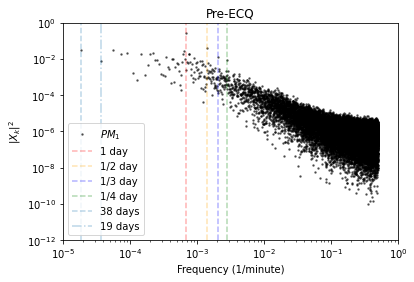

In [5]:
fig, ax = plt.subplots()
ax.loglog(pm1_prepandemic_spec.freq, pm1_prepandemic_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{1}$',markersize=3, alpha=0.5)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')

ax.set_ylim(1e-12, 1e0)
ax.set_xlim(1e-5, 1e0)
# ax.set_xlim(1e-12, 1e1)
# ax.loglog(x, (x**(-1.61))*0.5e-6)
# ax.axvline(pm1_prepandemic_spec.freq[1:].min(), alpha = 0.3, linestyle = '--')
ax.axvline(1/(60*24), alpha = 0.3, linestyle = '--', label = '1 day', color = 'red')
ax.axvline(1/(0.5*60*24), alpha = 0.3, linestyle = '--',label = '1/2 day', color = 'orange')
ax.axvline(1/(60*24/3), alpha = 0.3, linestyle = '--',label = '1/3 day', color = 'blue')
ax.axvline(1/(60*24/4), alpha = 0.3, linestyle = '--',label = '1/4 day', color = 'green')
ax.axvline(pm1_prepandemic_spec.freq[1:].min(), alpha = 0.3, linestyle = '--', label = '38 days')
ax.axvline(pm1_prepandemic_spec.freq[1:].min()*2, alpha = 0.3, linestyle = '-.', label = '19 days')
ax.legend(loc = 'lower left')
plt.title('Pre-ECQ')


Text(0.5, 1.0, 'ECQ')

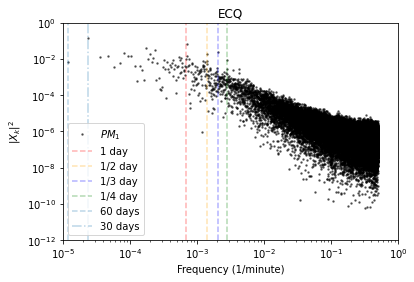

In [6]:
fig, ax = plt.subplots()
ax.loglog(pm1_ecq_spec.freq, pm1_ecq_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{1}$',markersize=3, alpha=0.5)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')

ax.set_ylim(1e-12, 1e0)
ax.set_xlim(1e-5, 1e0)
# ax.set_xlim(1e-12, 1e1)
x = np.logspace(-5, 0)
# ax.loglog(x, (x**(-1.61))*0.5e-6)

ax.axvline(1/(60*24), alpha = 0.3, linestyle = '--', label = '1 day', color = 'red')
ax.axvline(1/(0.5*60*24), alpha = 0.3, linestyle = '--',label = '1/2 day',color = 'orange')
ax.axvline(1/(60*24/3), alpha = 0.3, linestyle = '--',label = '1/3 day', color = 'blue')
ax.axvline(1/(60*24/4), alpha = 0.3, linestyle = '--',label = '1/4 day',color = 'green')
ax.axvline(pm1_ecq_spec.freq[1:].min(), alpha = 0.3, linestyle = '--', label = '60 days')
ax.axvline(pm1_ecq_spec.freq[1:].min()*2, alpha = 0.3, linestyle = '-.', label = '30 days')
ax.legend(loc = 'lower left')
plt.title('ECQ')


In [ ]:
result = powerlaw.Fit(data = pm1_ecq_spec.abs_fourier_coeff_square[1:])
print(result.alpha)

# $PM_{2.5}$

Text(0.5, 1.0, 'Pre-ECQ')

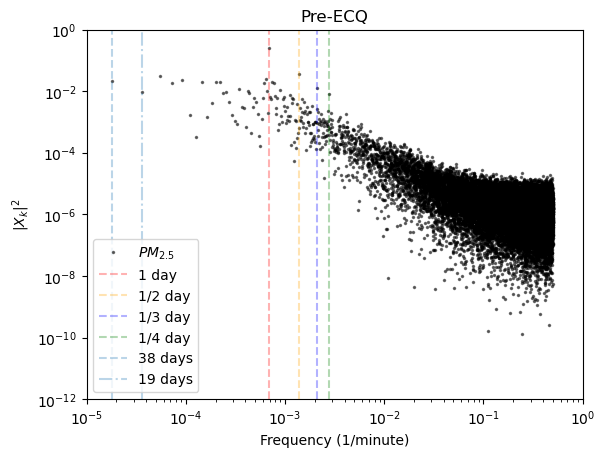

In [20]:
fig, ax = plt.subplots()
ax.loglog(pm25_prepandemic_spec.freq, pm25_prepandemic_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{2.5}$',markersize=3, alpha=0.5)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')

ax.set_ylim(1e-12, 1e0)
ax.set_xlim(1e-5, 1e0)
# ax.set_xlim(1e-12, 1e1)
x = np.logspace(-5, 0)
# ax.loglog(x, (x**(-1.61))*0.5e-6)
# ax.axvline(pm1_prepandemic_spec.freq[1:].min(), alpha = 0.3, linestyle = '--')
ax.axvline(1/(60*24), alpha = 0.3, linestyle = '--', label = '1 day', color = 'red')
ax.axvline(1/(0.5*60*24), alpha = 0.3, linestyle = '--',label = '1/2 day', color = 'orange')
ax.axvline(1/(60*24/3), alpha = 0.3, linestyle = '--',label = '1/3 day', color = 'blue')
ax.axvline(1/(60*24/4), alpha = 0.3, linestyle = '--',label = '1/4 day', color = 'green')
ax.axvline(pm25_prepandemic_spec.freq[1:].min(), alpha = 0.3, linestyle = '--', label = '38 days')
ax.axvline(pm25_prepandemic_spec.freq[1:].min()*2, alpha = 0.3, linestyle = '-.', label = '19 days')
ax.legend(loc = 'lower left')
plt.title('Pre-ECQ')


Text(0.5, 1.0, 'ECQ')

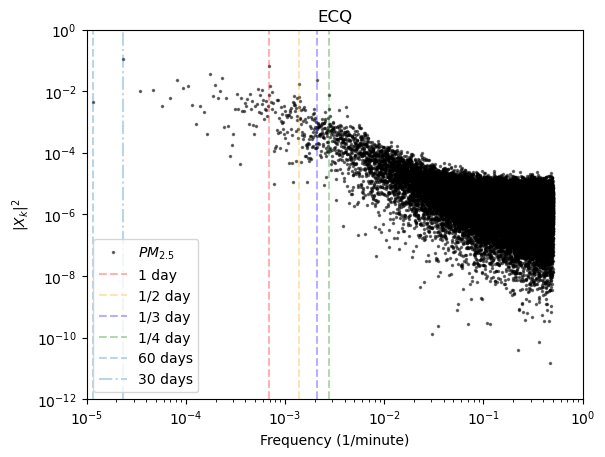

In [21]:
fig, ax = plt.subplots()
ax.loglog(pm25_ecq_spec.freq, pm25_ecq_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{2.5}$',markersize=3, alpha=0.5)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')

ax.set_ylim(1e-12, 1e0)
ax.set_xlim(1e-5, 1e0)
# ax.set_xlim(1e-12, 1e1)
x = np.logspace(-5, 0)
# ax.loglog(x, (x**(-1.61))*0.5e-6)
# ax.axvline(pm1_prepandemic_spec.freq[1:].min(), alpha = 0.3, linestyle = '--')
ax.axvline(1/(60*24), alpha = 0.3, linestyle = '--', label = '1 day', color = 'red')
ax.axvline(1/(0.5*60*24), alpha = 0.3, linestyle = '--',label = '1/2 day',color = 'orange')
ax.axvline(1/(60*24/3), alpha = 0.3, linestyle = '--',label = '1/3 day',color = 'blue')
ax.axvline(1/(60*24/4), alpha = 0.3, linestyle = '--',label = '1/4 day', color = 'green')
ax.axvline(pm25_ecq_spec.freq[1:].min(), alpha = 0.3, linestyle = '--', label = '60 days')
ax.axvline(pm25_ecq_spec.freq[1:].min()*2, alpha = 0.3, linestyle = '-.', label = '30 days')
ax.legend(loc = 'lower left')
plt.title('ECQ')


# $PM_{10}$

Text(0.5, 1.0, 'Pre-ECQ')

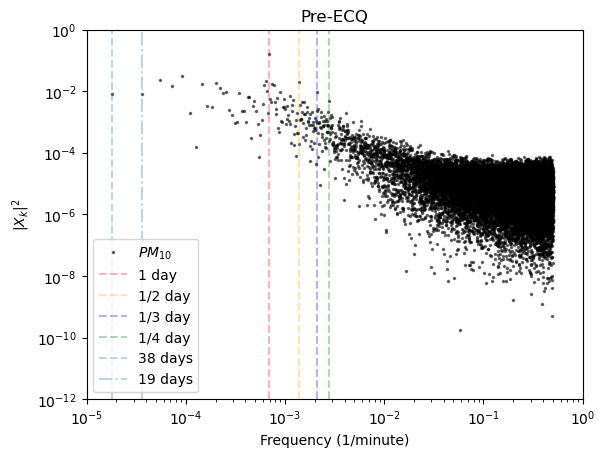

In [22]:
fig, ax = plt.subplots()
ax.loglog(pm10_prepandemic_spec.freq, pm10_prepandemic_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{10}$',markersize=3, alpha=0.5)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')

ax.set_ylim(1e-12, 1e0)
ax.set_xlim(1e-5, 1e0)
# ax.set_xlim(1e-12, 1e1)
x = np.logspace(-5, 0)
# ax.loglog(x, (x**(-1.61))*0.5e-6)
# ax.axvline(pm1_prepandemic_spec.freq[1:].min(), alpha = 0.3, linestyle = '--')
ax.axvline(1/(60*24), alpha = 0.3, linestyle = '--', label = '1 day', color = 'red')
ax.axvline(1/(0.5*60*24), alpha = 0.3, linestyle = '--',label = '1/2 day', color = 'orange')
ax.axvline(1/(60*24/3), alpha = 0.3, linestyle = '--',label = '1/3 day', color = 'blue')
ax.axvline(1/(60*24/4), alpha = 0.3, linestyle = '--',label = '1/4 day', color = 'green')
ax.axvline(pm10_prepandemic_spec.freq[1:].min(), alpha = 0.3, linestyle = '--', label = '38 days')
ax.axvline(pm10_prepandemic_spec.freq[1:].min()*2, alpha = 0.3, linestyle = '-.', label = '19 days')
ax.legend(loc = 'lower left')
plt.title('Pre-ECQ')


Text(0.5, 1.0, 'ECQ')

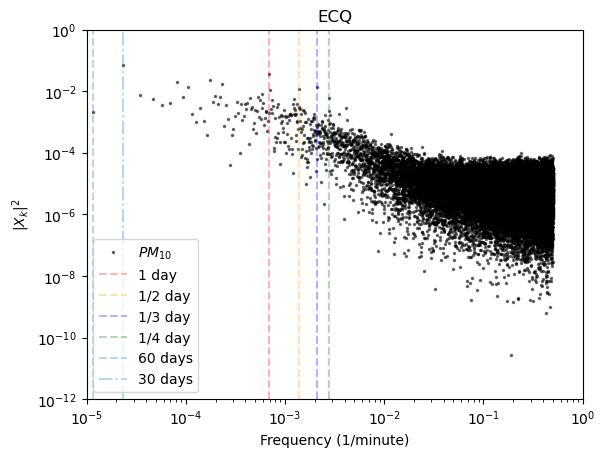

In [23]:
fig, ax = plt.subplots()
ax.loglog(pm10_ecq_spec.freq, pm10_ecq_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{10}$',markersize=3, alpha=0.5)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')

ax.set_ylim(1e-12, 1e0)
ax.set_xlim(1e-5, 1e0)
# ax.set_xlim(1e-12, 1e1)
x = np.logspace(-5, 0)
# ax.loglog(x, (x**(-1.61))*0.5e-6)
# ax.axvline(pm1_prepandemic_spec.freq[1:].min(), alpha = 0.3, linestyle = '--')
ax.axvline(1/(60*24), alpha = 0.3, linestyle = '--', label = '1 day', color = 'red')
ax.axvline(1/(0.5*60*24), alpha = 0.3, linestyle = '--',label = '1/2 day',color = 'orange')
ax.axvline(1/(60*24/3), alpha = 0.3, linestyle = '--',label = '1/3 day',color = 'blue')
ax.axvline(1/(60*24/4), alpha = 0.3, linestyle = '--',label = '1/4 day', color = 'green')
ax.axvline(pm25_ecq_spec.freq[1:].min(), alpha = 0.3, linestyle = '--', label = '60 days')
ax.axvline(pm25_ecq_spec.freq[1:].min()*2, alpha = 0.3, linestyle = '-.', label = '30 days')
ax.legend(loc = 'lower left')
plt.title('ECQ')
